In [71]:
#ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from scipy.stats import zscore
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [72]:
#データの取得
from sklearn.datasets import load_boston
boston = load_boston()
target = load_boston().target
target

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

In [73]:
#説明変数のデータフレーム化
X = pd.DataFrame(boston.data)
X.columns = boston.feature_names
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [74]:
#目的変数のデータフレーム化MEDV=地域の家賃の中央値
y = pd.DataFrame(target,columns=['MEDV'])
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


データセットの内容：米国ボストンの住宅価格/1993.0707 /Harrison, D. and Rubinfeld D.L. J. Environ
回帰問題に対処するために多くの論文で使用されている

#CRIM	人口 1 人当たりの犯罪発生数
#ZN	25,000 平方フィート以上の住居区画の占める割合
#INDUS	小売業以外の商業が占める面積の割合
#CHAS	チャールズ川によるダミー変数 (1: 川の周辺, 0: それ以外)
#NOX	NOx の濃度 窒素化合物
#RM	住居の平均部屋数
#AGE	1940 年より前に建てられた物件の割合
#DIS	5 つのボストン市の雇用施設からの距離 (重み付け済)
#RAD	環状高速道路へのアクセスしやすさ
#TAX	$10,000 ドルあたりの不動産税率の総計
#PTRATIO	町毎の児童と教師の比率
#B	町毎の黒人 (Bk) の比率を次の式で表したもの。 1000(Bk – 0.63)^2
#LSTAT	給与の低い職業に従事する人口の割合 (%)
#MEDV 地域の家賃の中央値

In [75]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


前処理
最小値、最大値を見て、おかしな値が無いかを調べる。例えば割合を示すデータに負の値や１００より上の数値がないかどうか。０、１データに他の値が入っていないか。連続値の標準化が必要かどうかを検討する。

機械学習の手法選択
目的変数の値から、分類問題なのか回帰問題なのかを検討する。
countを見ることで、手持ちのデータ量が多いか少ないのかを把握する。

機械学習の特徴選択
連続変数をカテゴリー変数にするなどの処理が必要かどうか。仮説の検証に必要のない列の削除。

In [76]:
boston = pd.concat([X, y], axis =1)
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


MEDVとの相関
相関があるとは、一方の値が変化すればもう一方も変化するということ。一方が増加した場合他方も増加するものを正の相関、他方が減少するものは負の相関という。
MEDVと最も相関が有るのはLSTAT（-0.73）、次いでRM（0.69）、PTRATIO（−０．５０）である
相関がある変数を明らかにすることで、目的変数への影響度を知ることが出来、変数の選択に役立つ。また、説明変数同士で相関が非常に高い変数が含まれている場合、多重共線性が生じ結果を歪めることにつながるので、どちらかの変数を削除する。その基準に成る。

落とし穴
相関係数は外れ値の影響を受けやすく、一つの外れ値があることで、値が大きくかわってしまう。そのため、散布図を見て外れ値の影響を受けていなさそうかの確認を行うべきである。また、相関係数が高くても因果関係を表しているわけではないことも注意が必要である。

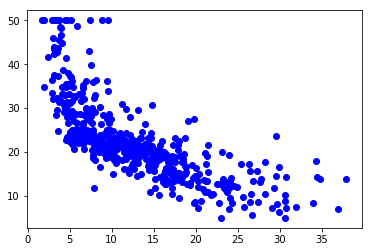

In [77]:
plt.scatter(boston["LSTAT"], boston["MEDV"] ,c="b")
plt.show()

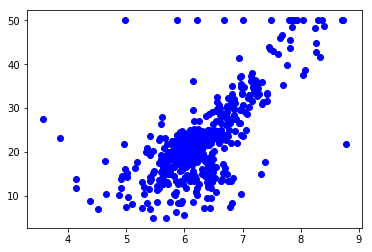

In [78]:
plt.scatter(boston["RM"], boston["MEDV"] ,c="b")
plt.show()

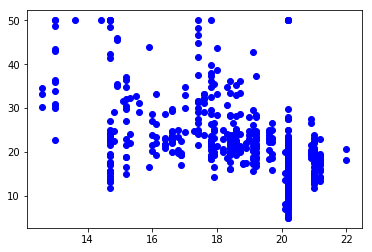

In [79]:
plt.scatter(boston["PTRATIO"], boston["MEDV"] ,c="b")
plt.show()

二変数の可視化
外れ値は存在するがデータ量も多いため、概ね問題ないことがわかる。

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=1)
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
42,0.14150,0.0,6.91,0.0,0.4480,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81
58,0.15445,25.0,5.13,0.0,0.4530,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86
385,16.81180,0.0,18.10,0.0,0.7000,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81
78,0.05646,0.0,12.83,0.0,0.4370,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
424,8.79212,0.0,18.10,0.0,0.5840,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16
160,1.27346,0.0,19.58,1.0,0.6050,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50
185,0.06047,0.0,2.46,0.0,0.4880,6.153,68.8,3.2797,3.0,193.0,17.8,387.11,13.15
101,0.11432,0.0,8.56,0.0,0.5200,6.781,71.3,2.8561,5.0,384.0,20.9,395.58,7.67
268,0.54050,20.0,3.97,0.0,0.5750,7.470,52.6,2.8720,5.0,264.0,13.0,390.30,3.16
173,0.09178,0.0,4.05,0.0,0.5100,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04


In [103]:
# モデルを作成　深さ１
from sklearn.tree import DecisionTreeRegressor

clf1 = DecisionTreeRegressor(max_depth=1)
clf1 = clf1.fit(X_train, y_train)
clf1.score(X_test, y_test)

0.40655066035393861

In [104]:
# モデルを作成　深さ2

clf2 = DecisionTreeRegressor(max_depth=2)
clf2 = clf2.fit(X_train, y_train)

clf2.score(X_test, y_test)

0.74360667083305332

In [105]:
# モデルを作成　深さ3
from sklearn import tree
clf3 = tree.DecisionTreeRegressor(max_depth=3)
clf3 = clf3.fit(X_train, y_train)

clf3.score(X_test, y_test)

0.81715036111411954

In [106]:
#学習曲線

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

Automatically created module for IPython interactive environment


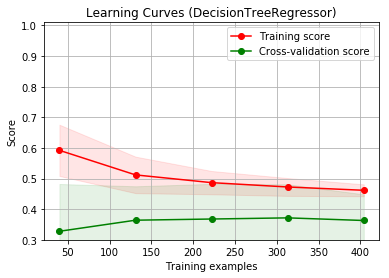

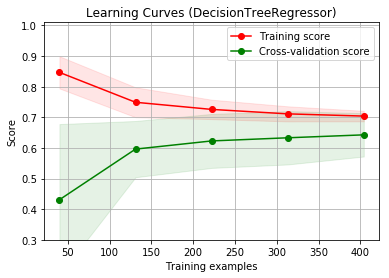

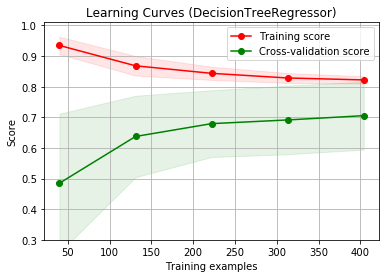

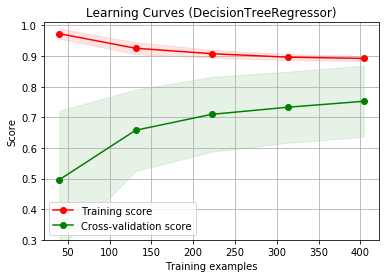

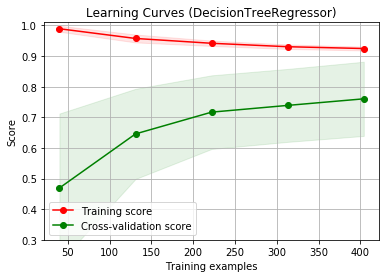

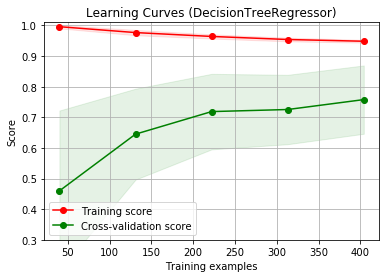

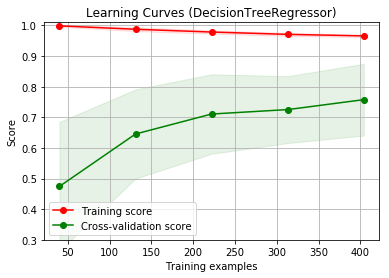

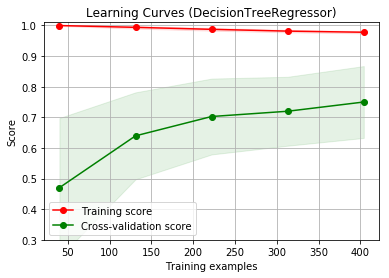

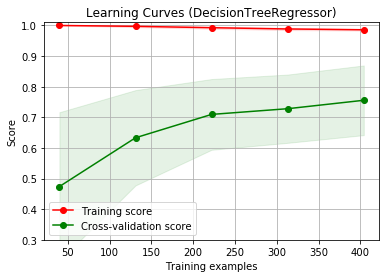

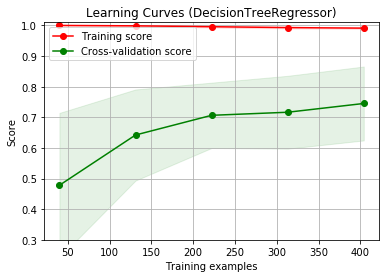

In [107]:
#学習曲線の描画　深さ１〜１１で学習の様子を可視化

%matplotlib inline
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor



title = "Learning Curves (DecisionTreeRegressor)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

for degree in range(1,11):
    estimator = DecisionTreeRegressor(max_depth=degree)
    plot_learning_curve(estimator, title , X, y, ylim=(0.3, 1.01), cv=cv, n_jobs=4)

High Variance：オーバーフィットしているためにモデルの精度が低い。データを増やす、変数を減らすなどを行うことで精度を高めることができる。
High Bias：アンダーフィットしているめにモデルの予測精度が低い。データを多く追加しても精度の向上は見込めず、変数の数を増やす、２乗や３乗の変数を追加してみるなどを行うことで精度の向上が見込める。
もっとも結果が良いと思われた深さ：５
クロスバリデーションの精度が８割近くまで向上しており、Training scoreとの差も他に比べて小さい。データ数を増やしていくと、さらに結果は良くなると考えられる。

In [110]:
#グリッドサーチ
from sklearn.metrics import r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 4}


In [118]:
# モデルを作成　深さ４
from sklearn import tree
clf4 = tree.DecisionTreeRegressor(max_depth=5)
clf4 = clf4.fit(X_train, y_train)

clf4.score(X_test, y_test)

0.8585625918470805

In [119]:
# モデルを作成　深さ5
from sklearn import tree
clf5 = tree.DecisionTreeRegressor(max_depth=5)
clf5 = clf5.fit(X_train, y_train)

clf5.score(X_test, y_test)

0.71018622028573808

グリッドサーチとは、探索範囲を格子状（グリッド）に分け、ハイパーパラメータの格子を作る。それぞれのパラメーターの組み合わせでモデルを学習し、正答率や精度を求める。その上で最も良い組み合わせを選ぶ手法。→データが多い場合に１回のモデルの学習に多くの時間がかかる。
グリットサーチのようなハイパーパラメータを探索手法としては、他にベイズ最適化というものがある。関数がブラックボックス化されている場合や計算のコストが非常に大きい場合でも使用できる。正答率や精度の高い組み合わせにあたりをつけて（獲得関数が最大になるように）探すため、効率的に制度の良い組み合わせを探すことができる。また局所解に陥らないようにするため、精度が低い場所も探索してくれる。
グリッドサーチの場合、一定間隔でパラメータを試すため、試していないパラメータは考慮できないという欠点を持つ。また、計算コストが大きくなってしまう。ベイズ最適化は全てのパラメータの中でどこが一番良いかを探索するが、１番良い精度のものを必ずしも選び出すわけではなく、繰り返しの少ない場合は精度が悪くなる可能性もある。

In [114]:
#グリッドサーチ cv=3
from sklearn.metrics import r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=3)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 9}


In [124]:
# モデルを作成　深さ9
from sklearn import tree
clf6 = tree.DecisionTreeRegressor(max_depth=9)
clf6 = clf6.fit(X_train, y_train)

clf6.score(X_test, y_test)

0.82591586845679565

In [116]:
#グリッドサーチ cv=10
from sklearn.metrics import r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=10)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 5}


In [129]:
#グリッドサーチ　スコアを二乗誤差へ変更

from sklearn.metrics import r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(mean_squared_error)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=10)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 1}


In [125]:
# モデルを作成　深さ5
from sklearn import tree
clf5 = tree.DecisionTreeRegressor(max_depth=5)
clf5 = clf5.fit(X_train, y_train)

clf5.score(X_test, y_test)

0.71018622028573808

CV=5で深さ４のときの精度が最も高く0.8585となる


SyntaxError: invalid syntax (<ipython-input-132-8916451a1802>, line 2)